# Monthly Rain Reports


In [2]:
%load_ext autoreload
%autoreload 2

import logging
from pathlib import Path
import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
import contextily as cx

from mergedownloader.inpeparser import INPE, INPEParsers, INPETypes
from mergedownloader.downloader import Downloader
from mergedownloader.utils import FileType
from rainreporter.reporter import Reporter

import rasterio as rio
import xarray as xr
from mergedownloader.utils import GISUtil

## Opening Basins of INterest

In [3]:
shapes_mac = Path('/Users/cordmaur/Library/CloudStorage/OneDrive-AgênciaNacionaldeÁguas/Trabalho/SOE/COVEC/Bases/bacias de interesse SOE')
shapes_container = Path('/workspaces/reports_folder/bases/bacias_interesse')

shapes = shapes_mac if shapes_mac.exists() else shapes_container
assert shapes.exists()

In [4]:
basins = {file.stem.split('_')[-1]: file for file in shapes.iterdir() if file.suffix == '.shp'}

In [5]:
basins

{'proj': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/Bacaia_Paranaiba_diss_proj.shp'),
 'ParaibaDoSul': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacia_ParaibaDoSul.shp'),
 'ANA': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacias_interesse_ANA.shp'),
 'Doce': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacia_Doce.shp'),
 'wgs84': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacia_Doce_wgs84.shp'),
 'Itapecuru': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacia_Itapecuru.shp'),
 'Jequitinhonha': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacia_Jequitinhonha.shp'),
 'Madeira': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacia_Madeira.shp'),
 'PortoVelho': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacia_Madeira_em_PortoVelho.shp'),
 'Negro': PosixPath('/workspaces/reports_folder/bases/bacias_interesse/bacia_Negro.shp'),
 'Paraguai': 

## Creating the Reporter Object

In [6]:
reporter = Reporter(
    server=INPEParsers.FTPurl, 
    download_folder='/workspaces/reports_folder/downloads', 
    log_level=logging.INFO,
    config_file='../reporter.json5'
)


../data/cities/cidades.shp
../data/states/BR_UF_2022.shp
../data/rivers/main_rivers.shp
../data/dams


## Monthly Report

In [7]:
# specify report configurations
report_kwgs = {
    'shp': '/workspaces/reports_folder/bases/BaciasIncrementais/ParaibaDoSul/Funil_v2_diss_proj.shp',
    'nome': "",
    'total_meses': 23,
    'inicio_periodo_chuvoso': 10,
}



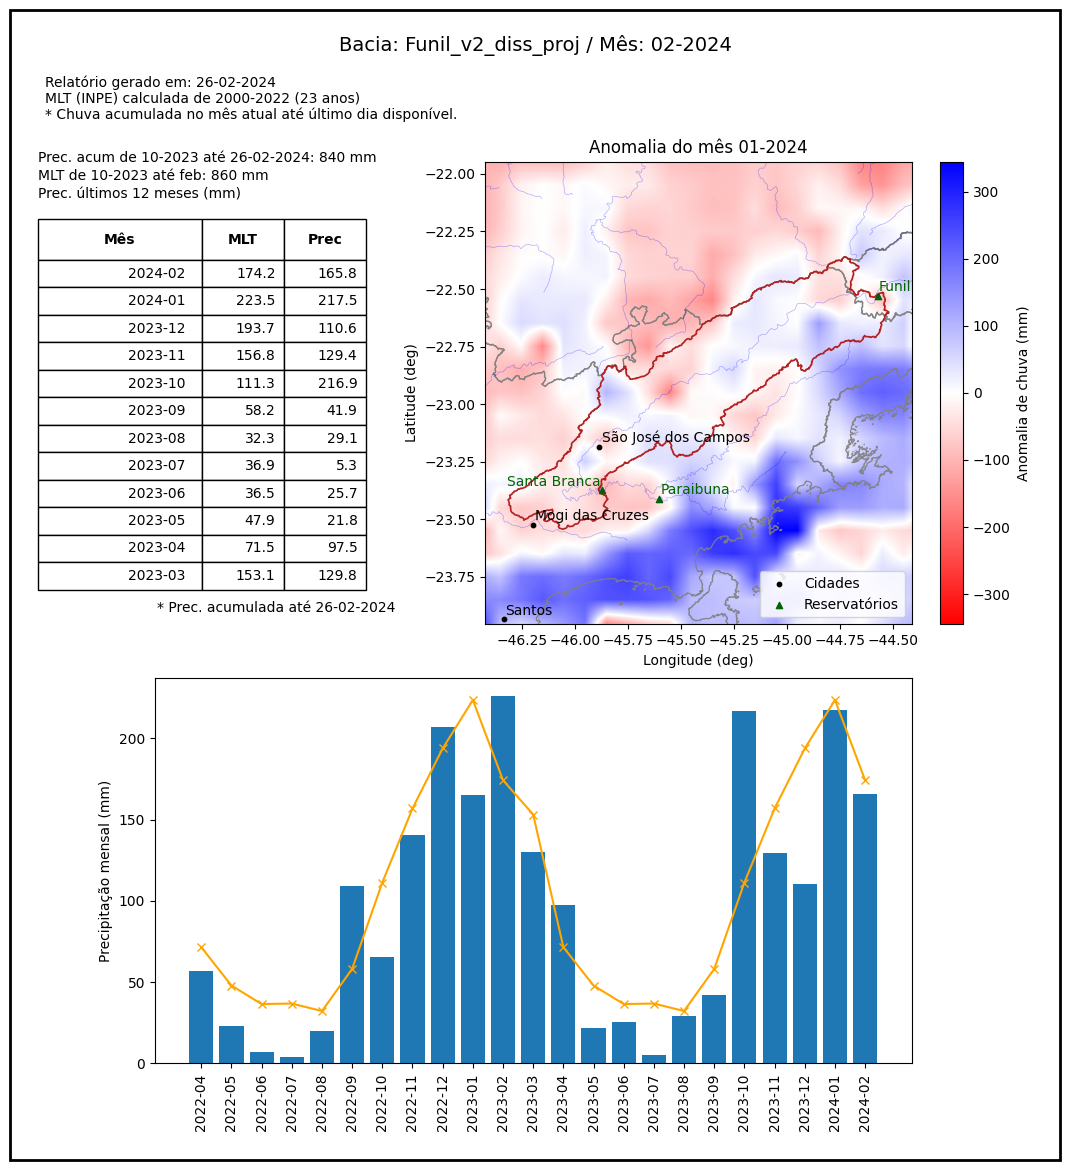

In [146]:
report = reporter.generate_report(rep_type='Mensal', date_str='2024-02', **report_kwgs)

In [10]:
fig, axs, rain_ts, lta_ts, shp = report

In [112]:
ax.text?

Signature: ax.text(x, y, s, fontdict=None, **kwargs)
Docstring:
Add text to the Axes.

Add the text *s* to the Axes at location *x*, *y* in data coordinates.

Parameters
----------
x, y : float
    The position to place the text. By default, this is in data
    coordinates. The coordinate system can be changed using the
    *transform* parameter.

s : str
    The text.

fontdict : dict, default: None
    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by `.rcParams`.

Returns
-------
`.Text`
    The created `.Text` instance.

Other Parameters
----------------
**kwargs : `~matplotlib.text.Text` properties.
    Other miscellaneous text parameters.

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
    alpha: scalar or None
    animated: bool
    backgroundcolor: color
    bbox: dict with pro

In [141]:
ax = axs[0]
plt_ax = ax
ax.clear()


In [143]:

# create a dataframe to plot as a table
rain_df = rain_ts.rename("Prec_f").to_frame()
rain_df["MLT_f"] = lta_ts.values
rain_df["MLT"] = rain_df["MLT_f"].apply(lambda x: f"{x:.1f}")
rain_df["Prec"] = rain_df["Prec_f"].apply(lambda x: f"{x:.1f}")
rain_df["Mês"] = rain_df.index.astype("str")
rain_df["Mês"] = rain_df["Mês"].str[:7]
rain_df = rain_df.sort_index(ascending=False)
rain_df.index = pd.DatetimeIndex(rain_df.index)
accum_text = f"Prec. acum de 10-2023"
accum_text += f" até 26-02-2024: 840 mm"
mlt_text = f"MLT de 10-2023 até "
mlt_text += f"feb: 860 mm"  # type: ignore

rain_df = rain_df[["Mês", "MLT", "Prec"]]


plt_ax.text(-0.50, 1, accum_text)
plt_ax.text(-0.5, 0.96, mlt_text)
plt_ax.text(-0.5, 0.92, "Prec. últimos 12 meses (mm)", fontsize=10)

table = plt_ax.table(
    cellText=rain_df.iloc[:12].values,
    colLabels=rain_df.columns.to_list(),
    # loc="top",
    colWidths=[0.5, 0.25, 0.25],
    bbox=[-0.5, 0.075, 1.4, 0.8],  # type: ignore
)

# set table properties
table.auto_set_font_size(False)
table.set_fontsize(10)

plt_ax.axis("off")

# set table headings
for i in range(3):
    table[0, i].set_height(0.05)
    table[0, i].set_text_props(weight="bold")

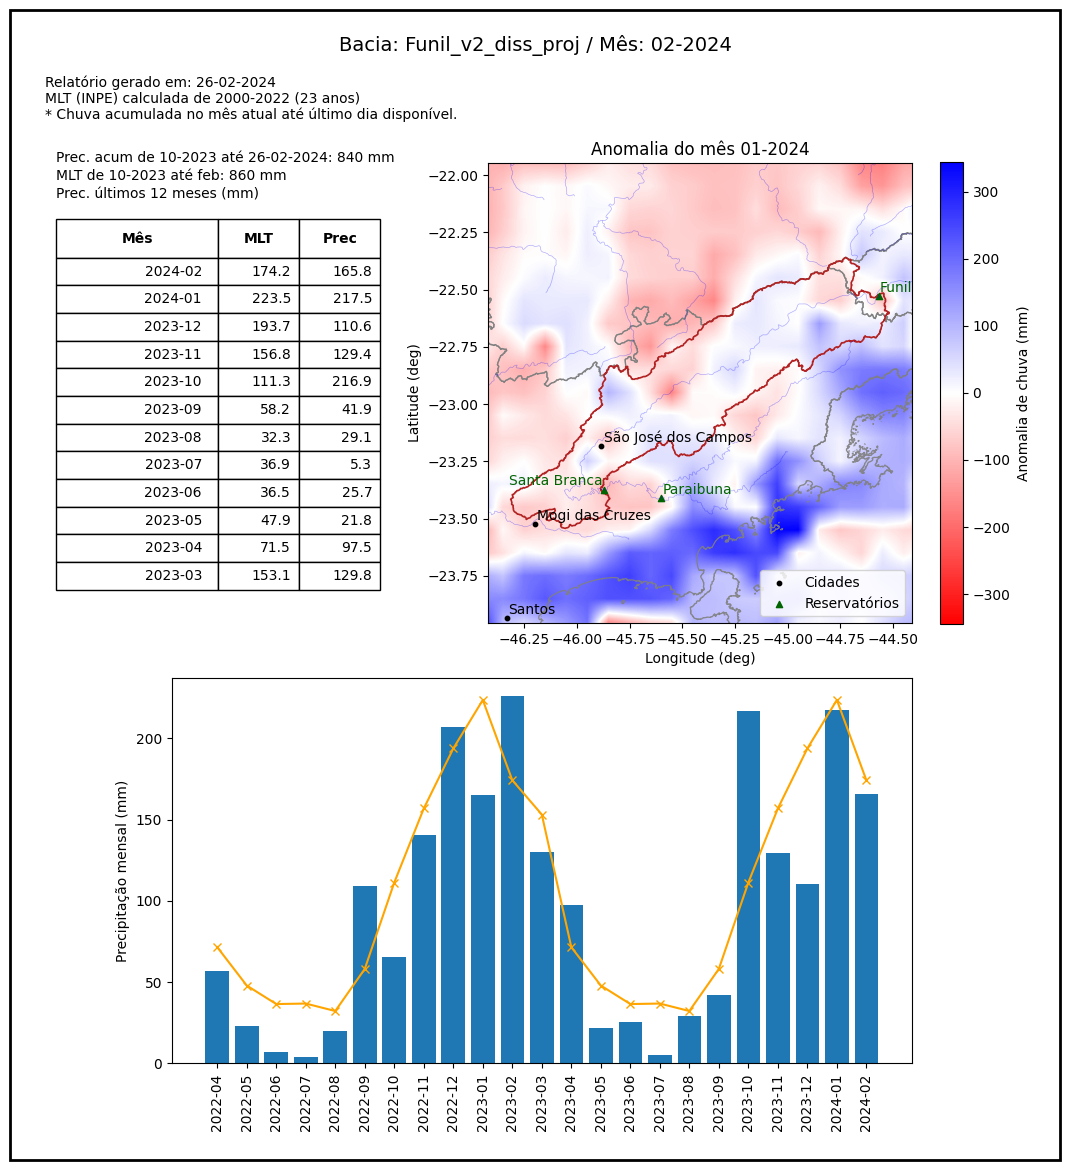

In [144]:
fig

# Process Hot Folder

In [3]:
reporter = Reporter(
    server=INPEParsers.FTPurl, 
    download_folder='/workspaces/reports_folder/downloads', 
    log_level=logging.DEBUG,
    bases_folder='/workspaces/reports_folder/bases/',
    config_file='../reporter.json5'

    # parsers=INPEParsers.parsers,
    # post_processors=INPEParsers.post_processors
)


../data/cities/cidades.shp
../data/states/BR_UF_2022.shp
../data/rivers/main_rivers.shp
../data/dams


In [ ]:

reporter.process_folder(
    input_folder='/workspaces/reports_folder/hot_folder/',
    output_folder='/workspaces/reports_folder/output/',
    hot=False
)

# Process Entire Folder

In [35]:
reporter = Reporter(
    server=INPEParsers.FTPurl, 
    download_folder='/workspaces/reports_folder/downloads', 
    log_level=logging.INFO,
    bases_folder='/workspaces/reports_folder/bases/',
    config_file='../reporter.json5'
    # parsers=INPEParsers.parsers,
    # post_processors=INPEParsers.post_processors
)

../data/cities/cidades.shp
../data/states/BR_UF_2022.shp
../data/rivers/main_rivers.shp
../data/dams


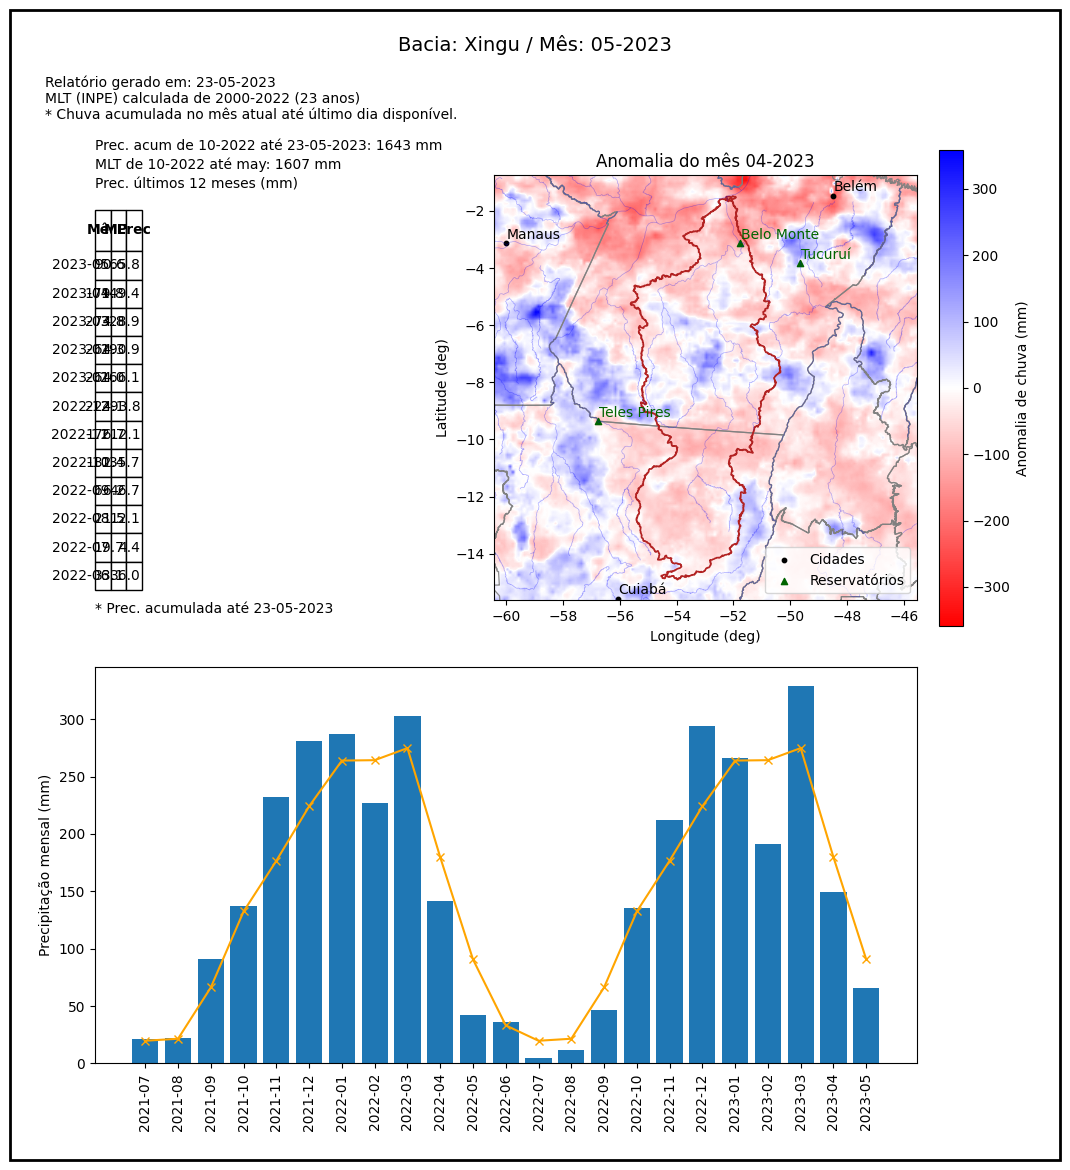

In [36]:
reporter.process_folder(
    input_folder='/workspaces/reports_folder/configs/',
    output_folder='/workspaces/reports_folder/output/'
)

In [3]:
shapes_container = Path('/workspaces/reports_folder/bases/BaciasIncrementais')
shapes_container.exists()


True

In [4]:
sf = shapes_container/'SaoFrancisco'

In [7]:
tres_marias = gpd.read_file(sf/'Incre_3_Marias_diss_proj.shp')

In [13]:
tres_marias

,Id,Nome,Area_km²,geometry
0,0,UHE Três Marias,57545.578138,"POLYGON ((-5052729.760 -2054701.559, -5052723...."


<Axes: >

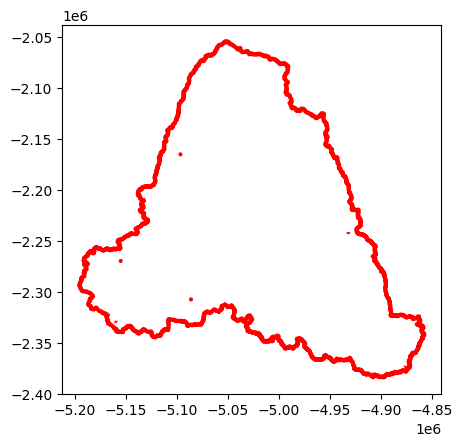

In [10]:
tres_marias.plot(facecolor='none', edgecolor= 'red', linewidth=3)

<Axes: >

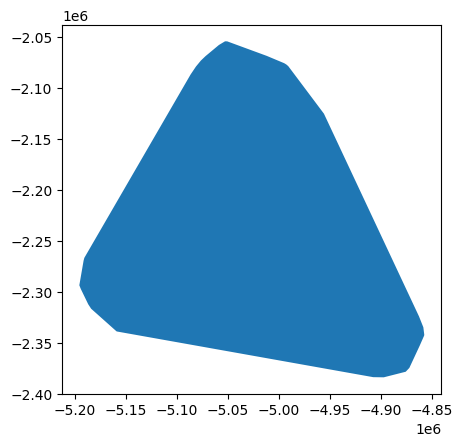

In [14]:
tres_marias.convex_hull.plot()

<Axes: >

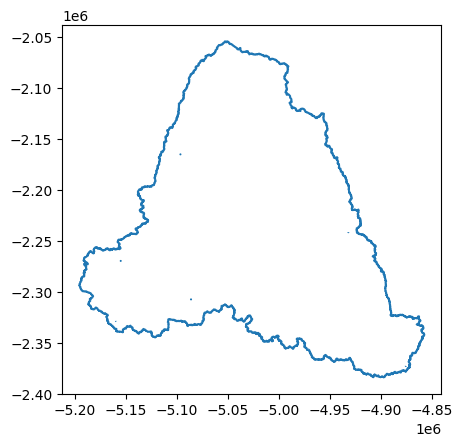

In [12]:
tres_marias.boundary.plot()